<a href="https://colab.research.google.com/github/jkoniecznyy/Machine-Learning-pyton/blob/main/ML_7_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie
Zadanie polega na własnoręcznym zaimplementowaniu algorytmu k-means. Algorytm powinien być zaimplementowany w oparciu o bibliotekę `Numpy`. Podczas implementacji nie wolno korzystać z bibliotek typu `sklearn`, które mają ten algorytm wbudowany. Dopuszczalne jest natomiast wykorzystywanie tego rodzaju bibliotek w celach porównawczych, do sprawdzenia czy nasz algorytm działa poprawnie. Ocenie podlega rozwiązanie i odpowiedź.


- Zaimplementuj `K-means` w przestrzeni dwuwymiarowej (każdy punkt ma dwie współrzędne). - *(dostateczny)*
- Zmniejsz problem związany z 'utknięciem' w lokalnym optimum poprzez wywołanie algorytmu 100 razy i wybranie rozwiązania z najmniejszą funkcją kosztu - *(dostateczny plus)*
- Zwizualizuj wyniki na wykresie - *(dobry)*
- Rozszerz swoją implementację o `K-means++` lub zmień ją tak by działała w n-wymiarowej przestrzeni - *(bardzo dobry)*

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

In [ ]:
def drawGraph(centroids, clusters, nrOfCentroids):
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    plt.figure()
    for i in range(nrOfCentroids):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % len(colors)], marker='.')
        plt.scatter(centroids[i][0], centroids[i][1], c='k', marker='x')


def calculateCost(centroids, clusters, totalPoints):
    totalSum = 0.0
    for cluster in clusters:
        totalSum += ((np.linalg.norm(clusters[cluster] - centroids[cluster])) ** 2)
    return totalSum / totalPoints


def createClusters(data, centroids, nrOfCentroids):
    clusters = {}
    for i in range(nrOfCentroids):
        clusters[i] = []
    for d in data:
        distances = []
        for centroid in centroids:
            distances.append(np.linalg.norm(d - centroid))
        nrOfCluster = distances.index(min(distances))
        clusters[nrOfCluster].append(d)
    return clusters

def createCentroids(data):
    centStart = np.random.randint(len(data) - nrOfCentroids - 1)
    centEnd = centStart + nrOfCentroids
    return data[centStart:centEnd]


def moveCentroids(centroids, clusters):
    for cluster in clusters:
        averaged = np.average(clusters[cluster], axis=0)
        centroids[cluster] = averaged
    return centroids


def kmeans(data, nrOfCentroids=3, limit1=100, limit2=50):
    cost = np.inf
    for i in range(limit1):
        centroidsTemp = createCentroids(data)
        for x in range(limit2):
            clustersTemp = createClusters(data, centroidsTemp, nrOfCentroids)
            centroidsTemp = moveCentroids(centroidsTemp, clustersTemp)

        costTemp = calculateCost(centroidsTemp, clustersTemp, len(data))
        if costTemp < cost:
            cost = costTemp
            centroids = centroidsTemp
            clusters = clustersTemp
    drawGraph(centroidsTemp, clustersTemp,nrOfCentroids)
    return centroids, clusters, cost

cost:  0.12221221397824618


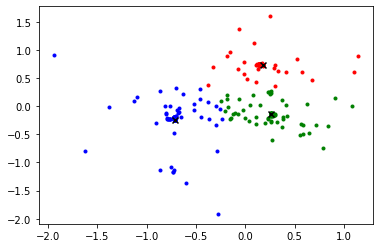

In [ ]:
#odpalanie dla limitów 100, 50
nrOfDimensions = 2
nrOfCentroids = 3
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km = kmeans(points, nrOfCentroids, 100, 50)
print('cost: ', km[2])

2 Wymiary
2 centroidy  0.5378959899940218
4 centroidy:  0.2659527930082128


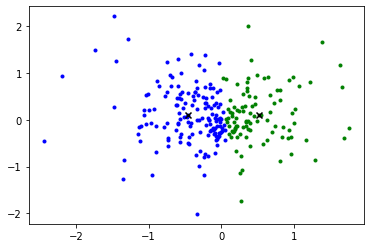

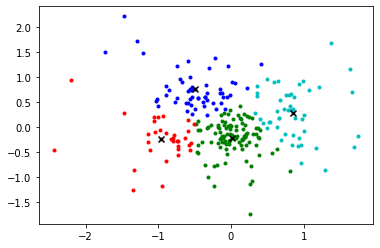

In [ ]:
#wyniki gorsze bo odpalam dla limitów 10,10
nrOfDimensions = 2
nrOfCentroids = 2
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeans(points, nrOfCentroids,  10, 10)
nrOfCentroids += 2
km2 = kmeans(points, nrOfCentroids, 10, 10)

print(f'{nrOfDimensions} Wymiary')
print(f'{nrOfCentroids-2} centroidy ', km1[2])
print(f'{nrOfCentroids} centroidy: ', km2[2])

2 Wymiary
4 centroidy  0.3230277995849658
6 centroidy:  0.17865757399448137


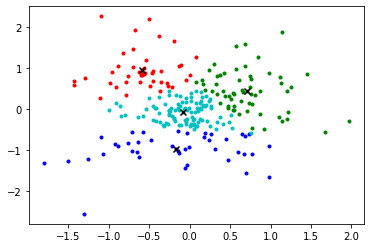

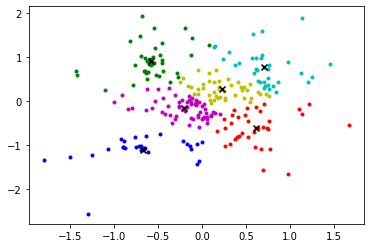

In [ ]:
#wyniki gorsze bo odpalam dla limitów 10,10
nrOfDimensions = 2
nrOfCentroids = 4
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeans(points, nrOfCentroids, 10, 10)
nrOfCentroids += 2
km2 = kmeans(points, nrOfCentroids, 10, 10)

print(f'{nrOfDimensions} Wymiary')
print(f'{nrOfCentroids-2} centroidy ', km1[2])
print(f'{nrOfCentroids} centroidy: ', km2[2])

4 Wymiary
2 centroidy  1.1323974449120597
4 centroidy:  0.7815157791099936


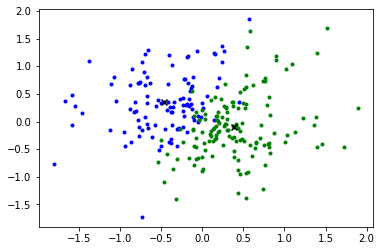

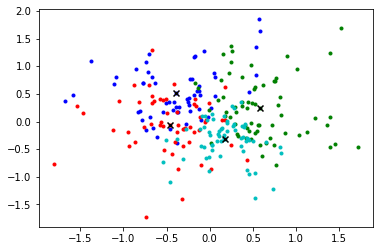

In [ ]:
#wyniki gorsze bo odpalam dla limitów 10,10
nrOfDimensions = 4
nrOfCentroids = 2
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeans(points, nrOfCentroids, 10, 10)
nrOfCentroids += 2
km2 = kmeans(points, nrOfCentroids, 10, 10)

print(f'{nrOfDimensions} Wymiary')
print(f'{nrOfCentroids-2} centroidy ', km1[2])
print(f'{nrOfCentroids} centroidy: ', km2[2])

4 Wymiary
4 centroidy  0.8491601489761496
6 centroidy:  0.5930914746100174


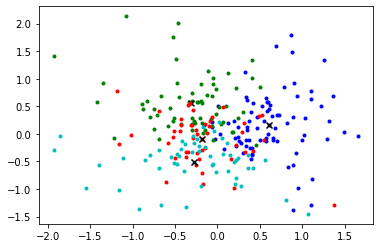

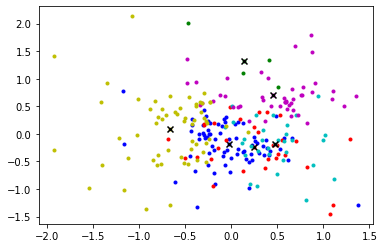

In [ ]:
#wyniki gorsze bo odpalam dla limitów 10,10
nrOfDimensions = 4
nrOfCentroids = 4
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeans(points, nrOfCentroids, 10, 10)
nrOfCentroids += 2
km2 = kmeans(points, nrOfCentroids, 10, 10)

print(f'{nrOfDimensions} Wymiary')
print(f'{nrOfCentroids-2} centroidy ', km1[2])
print(f'{nrOfCentroids} centroidy: ', km2[2])